#Task 1

Implement nonlinear Transformation functions:
<ol>
<li> Log Transformation </li>
<li> Power-law Transformation </li>
</ol>

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_image_as_np_array(filepath):
    # Open the image file
    img = Image.open(filepath)
    
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    return img_array


In [76]:
def display_images(images, titles,max_img_per_row=3,vmin=0,vmax=255):
   
    num_images = len(images)
    max_images_per_row = max_img_per_row
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Calculate number of rows needed
    
    # Create the subplots
    fig, axs = plt.subplots(num_rows, max_images_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axs array in case of multiple rows
    axs = axs.flatten()
    
    for i in range(num_images):
        axs[i].imshow(images[i],cmap='grey',vmin=vmin,vmax=vmax)
        axs[i].set_title(titles[i])
        axs[i].axis('off')  # Hide axes
    
    # Turn off remaining subplots if there are any
    for i in range(num_images, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [2]:
blurring = load_image_as_np_array('DIP3E_Original_Images_CH03\Fig0333(a)(test_pattern_blurring_orig).tif')


In [17]:
def convolution(image,kernel):
    kw,kh=kernel.shape
    iw,ih=image.shape

    padtop,padbottom=(kw//2,kw//2)
    padleft,padright=(kh//2,kh//2)

    imagepadded=np.pad(image,((padtop,padbottom),(padleft,padright)))

    output=np.zeros((iw,ih))

    for i in range(iw):
        for j in range(ih):
            output[i,j]=(np.sum(imagepadded[i:i+kw,j:j+kh]*kernel))
    return output



In [24]:
def make_box_filter(n):
    return np.ones((n,n))/(n*n)

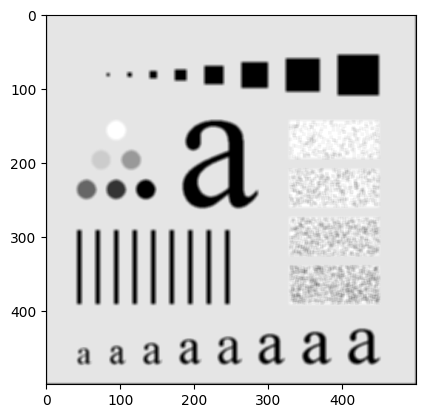

In [32]:
blurredimg = convolution(blurring,make_box_filter(5))
plt.imshow(blurredimg,cmap='grey',vmin=0,vmax=255)

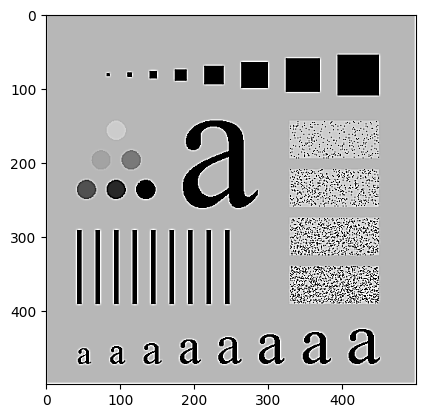

In [39]:
plt.imshow(1.8*blurring-blurredimg,cmap='grey',vmin=0,vmax=255)

In [47]:
def add_noise(image,probability):
    result=np.zeros(image.shape)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            outcome=np.random.rand()
            if outcome>=probability:
                result[i,j]=image[i,j]
            else:
                result[i,j]=np.random.randint(255)
    
    return result

In [48]:
circuit=load_image_as_np_array('DIP3E_Original_Images_CH03\circuit.tif')

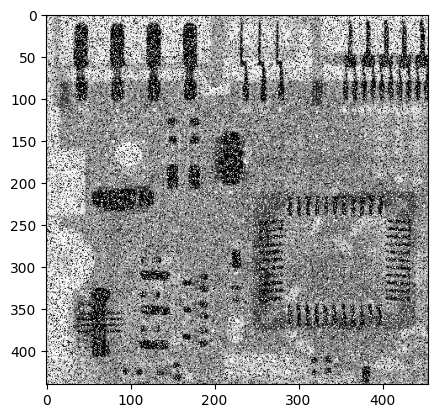

In [55]:
plt.imshow(add_noise(circuit,0.25),cmap='grey',vmin=0,vmax=255)

In [56]:
def median_filter(image,n):
    kw,kh=(n,n)
    iw,ih=image.shape

    padtop,padbottom=(kw//2,kw//2)
    padleft,padright=(kh//2,kh//2)

    imagepadded=np.pad(image,((padtop,padbottom),(padleft,padright)))

    output=np.zeros((iw,ih))

    for i in range(iw):
        for j in range(ih):
            output[i,j]=(np.median(imagepadded[i:i+kw,j:j+kh]))
    return output

In [59]:
def max_filter(image,n):
    kw,kh=(n,n)
    iw,ih=image.shape

    padtop,padbottom=(kw//2,kw//2)
    padleft,padright=(kh//2,kh//2)

    imagepadded=np.pad(image,((padtop,padbottom),(padleft,padright)))

    output=np.zeros((iw,ih))

    for i in range(iw):
        for j in range(ih):
            output[i,j]=(np.max(imagepadded[i:i+kw,j:j+kh]))
    return output

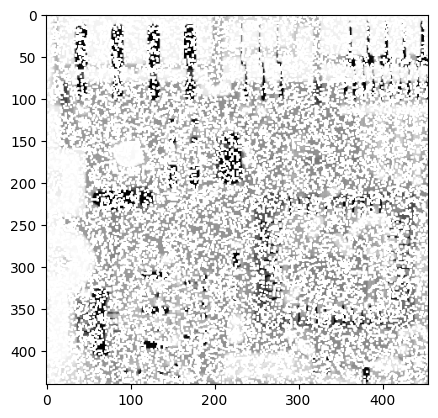

In [60]:
plt.imshow(max_filter(circuit,3),cmap='grey',vmin=0,vmax=255)

In [72]:
def laplacian_mask(n):
    center = n*n-1
    mask = -np.ones((n,n))
    mask[n//2,n//2]=center
    return mask

In [73]:
def laplacian_filter(image,n):
    result = np.zeros(image.shape)

    result = convolution(image,laplacian_mask(n))
    return result

In [80]:
moon = load_image_as_np_array('DIP3E_Original_Images_CH03\moon.tif')
moonsharp = moon + laplacian_filter(moon,3)
moonsharp2 = moon + .7*laplacian_filter(moon,3)

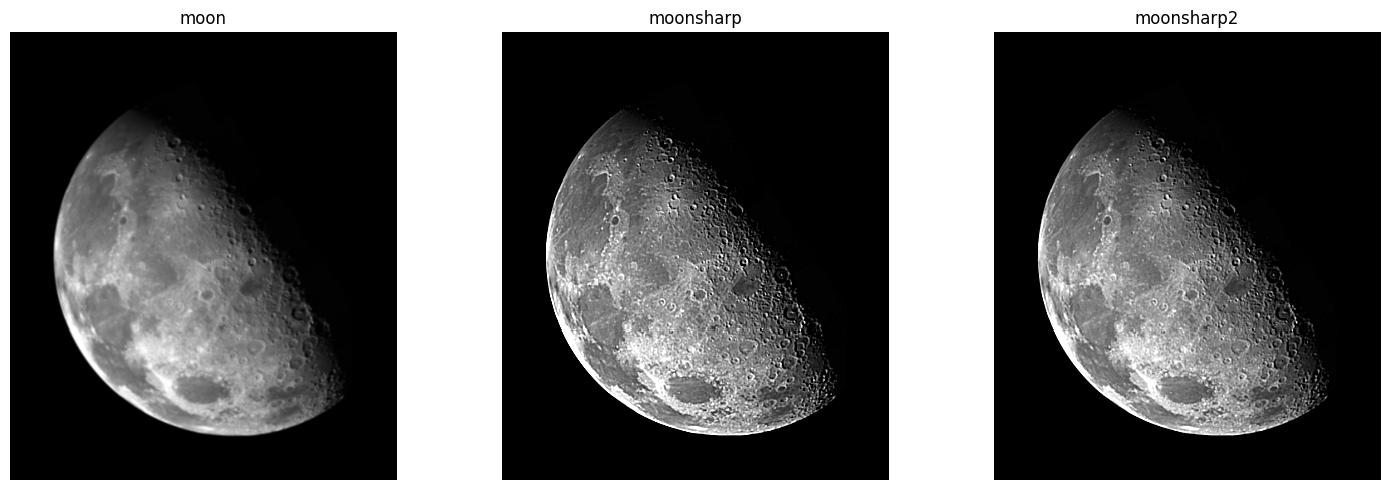

In [81]:
display_images([moon,moonsharp,moonsharp2],['moon','moonsharp','moonsharp2'])